# الهدف الرئيسي 



 SARIMA يهدف المشروع إلى تحليل بيانات مبيعات وول مارت لاكتشاف الأنماط الزمنية والتنبؤ بالمبيعات المستقبلية باستخدام نموذج  
 يساعد هذا التحليل على تحسين استراتيجيات البيع واتخاذ قرارات أفضل فيما يتعلق بالمخزون والتسويق,
 

# لماذا هذه المشكلة مهمة 

يساعد التنبؤ بالمبيعات على تقليل المخزون الزائد ومنع نفاد المنتجات في أوقات الذروة 💫

يساهم في تحسين التخطيط المالي من خلال توقع الإيرادات المستقبلية 💫

يمكّن الشركات من تحسين إدارة العروض الترويجية بناءً على التوقعات 💫

يقلل من الهدر في التوريد ويزيد من كفاءة سلسلة الإمداد 💫

 
 # أهمية حل المشكلة لكل قسم 


 ### : للفرع الإداري 

 تحسين التخطيط الاستراتيجي واتخاذ قرارات مدروسة حول الطلبات والمخزون 💫

التنبؤ بالمبيعات يساعد في إعداد الميزانيات بشكل دقيق 💫

### : لفريق التسويق 

فهم تأثير العروض الترويجية على المبيعات وتحديد أفضل الفترات لإطلاقها 💫

 تصميم حملات تسويقية مستهدفة بناءً على التوقعات المستقبلية 💫

### : لفريق التوريدات 

تحسين إدارة المخزون لتجنب نفاد المنتجات خلال فترات الذروة 💫

تقليل التكاليف اللوجستية من خلال تخطيط عمليات التوريد بفعالية 💫

# استيراد المكتبات والبيانات الضرورية 

In [6]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

# Another imports if needs
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [7]:
pd.options.display.max_columns=100 # to see columns 

In [8]:
df_store = pd.read_csv('stores.csv') #store data

In [9]:
df_train = pd.read_csv('train.csv') # train set

In [10]:
df_features = pd.read_csv('features.csv') #external information

# نظره أوليه ع البيانات ودمج ثلاث إطارات من البيانات

In [12]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [13]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [14]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [15]:
# merging 3 different sets
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [16]:
df.drop(['IsHoliday_y'], axis=1,inplace=True) # removing dublicated column

In [17]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column

In [18]:
df.head() # last ready data set

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [19]:
df.shape

(421570, 16)

# أرقام المتاجر والأقسام

In [21]:
df['Store'].nunique() # number of different values

45

In [22]:
df['Dept'].nunique() # number of different values

81

الآن، سأقوم بتحليل متوسط المبيعات الأسبوعية لكل متجر ولكل قسم  
 للتحقق مما إذا كان هناك أي قيم غير طبيعية أو غير متوقعة 
 يوجد 45 متجرًا و81 قسمًا داخل المتاجر

In [24]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,8

 نلاحظ وجود قيم غير صحيحة، مثل قيم فارغه أو سالبة للمبيعات 

ولا يمكن أن تكون قيمة المبيعات بالسالب 

وغير منطقي ألا يحقق أي قسم أي مبيعات طوال الأسبوع
 عشان كذا سأقوم بتعديل هذه القيم

In [26]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,B,118221


 عدد الصفوف التي تحتوي على قيم مبيعات غير صحيحة هو 1358 من إجمالي 421570 
 
   بنسبة 0.3% فقط
   
لذلك يمكنني حذف هذه الصفوف وتجاهلها دون تأثير على التحليل

In [28]:
df = df.loc[df['Weekly_Sales'] > 0]

In [29]:
df.shape # new data shape

(420212, 16)

# التاريخ

In [31]:
pd.concat([df['Date'].head(5), df['Date'].tail(5)])

0         2010-02-05
1         2010-02-12
2         2010-02-19
3         2010-02-26
4         2010-03-05
421565    2012-09-28
421566    2012-10-05
421567    2012-10-12
421568    2012-10-19
421569    2012-10-26
Name: Date, dtype: object

مدة بياناتنا من 5 اثنين 2010 إلى 26 عشره 2012 

# IsHoliday عمود

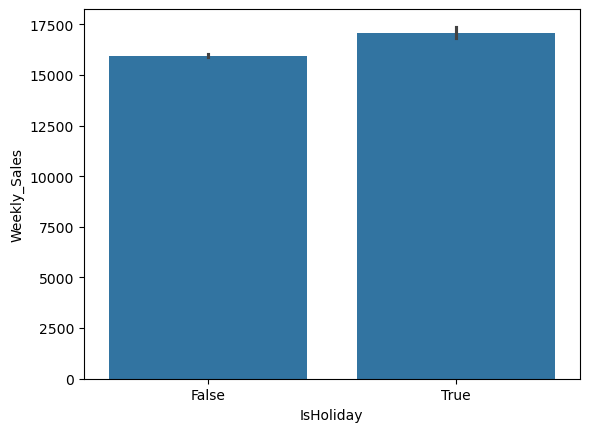

In [34]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.show()

In [35]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [36]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique() 

133

بعد 7-سبتمبر-2012 أصبحت العطلات في مجموعة الاختبار للتنبؤات

  عند تحليل البيانات نلاحظ أن متوسط المبيعات الأسبوعية في أيام العطلات أعلى بشكل ملحوظ مقارنةً بالأيام العادية
  
    في بيانات التدريب هناك 133 أسبوعًا للأيام العادية و10 أسابيع للعطل

أرغب في رؤية الفرق بين أنواع العطلات 

 لذا قمت بإنشاء أعمدة جديدة تمثل الأنواع الأربعة للعطل 

 سيتم تعبئة هذه الأعمدة بقيم منطقية نعم ولا
 
 إذا كان التاريخ ينتمي إلى هذا النوع من العطلات حيث ستكون القيمة نعم ولا لو لم يكن كذك 

In [39]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [40]:
# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [41]:
# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [42]:
#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

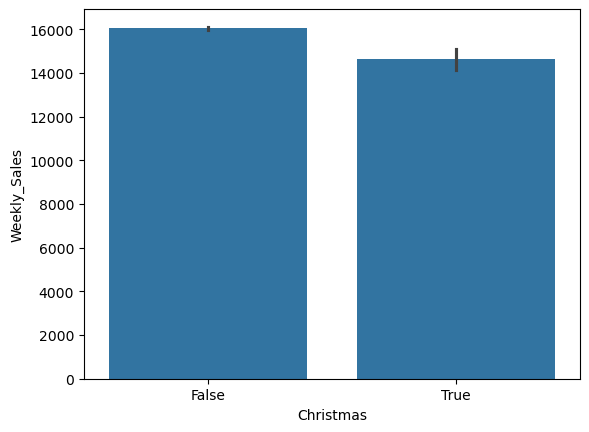

In [43]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday vs not-Christmas
plt.show()

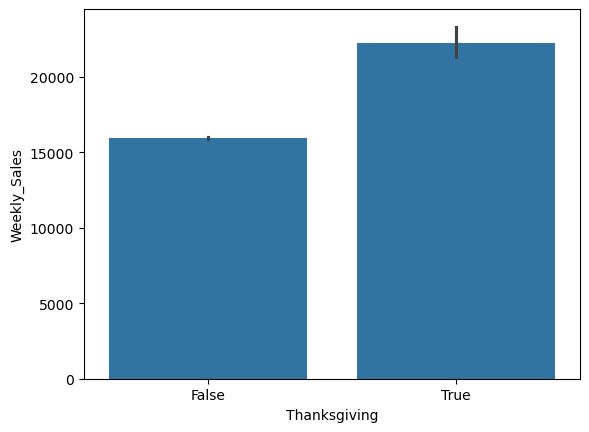

In [44]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) # Thanksgiving holiday vs not-thanksgiving
plt.show()

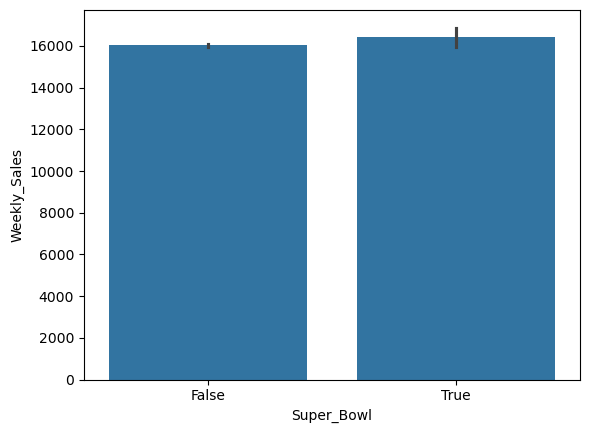

In [45]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) # Super bowl holiday vs not-super bowl
plt.show()

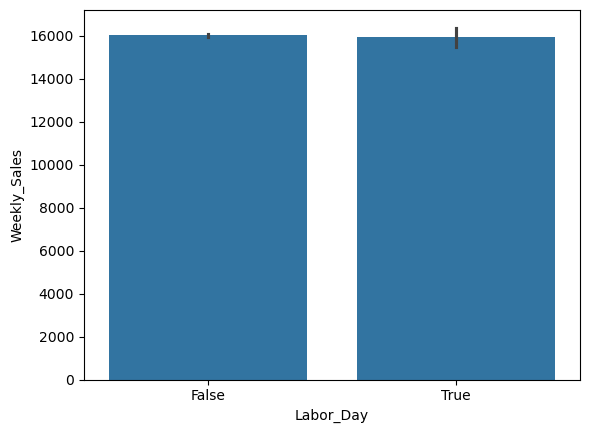

In [46]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) # Labor day holiday vs not-labor day
plt.show()

تُظهر الرسوم البيانية أن عيد العمال وعيد الميلاد لا يزيدان متوسط المبيعات الأسبوعية بشكل ملحوظ.
  هناك تأثير إيجابي على المبيعات خلال سبور بول


، لكن أعلى فرق يُلاحظ في أسبوع عيد الشكر أعتقد أن الناس يفضلون عادة شراء هدايا عيد الميلاد قبل 1-2 أسبوع من العيد، مما يقلل من تأثيره على المبيعات خلال أسبوع عيد الميلاد

بالإضافة إلى ذلك، توجد تخفيضات الجمعة السوداء في أسبوع عيد الشكر، مما يعزز المبيعات بشكل كبير

# تأثير النوع ع العطلات

هنا ثلاثة انواع مختلفة من تخزين البيانات وهي A , B , C

In [50]:
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Christmas 

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [51]:
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Labor Day

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [52]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Thanksgiving

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [53]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Super Bowl

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

نشوف هنا نسب انواع المتاجر

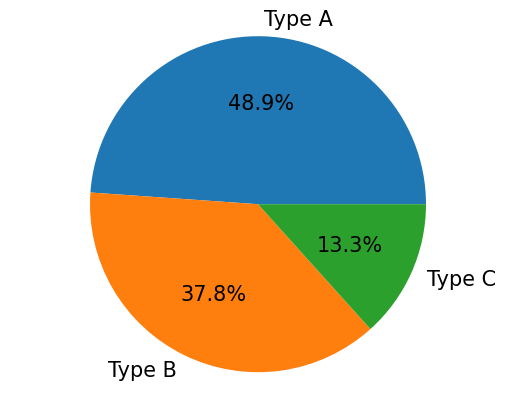

In [55]:
my_data = [48.88, 37.77 , 13.33 ]  #percentages
my_labels = 'Type A','Type B', 'Type C' # labels
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) #plot pie type and bigger the labels
plt.axis('equal')
mpl.rcParams.update({'font.size': 20}) #bigger percentage labels

plt.show()

In [56]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64

تقريبا نص المتاجر من نوع A

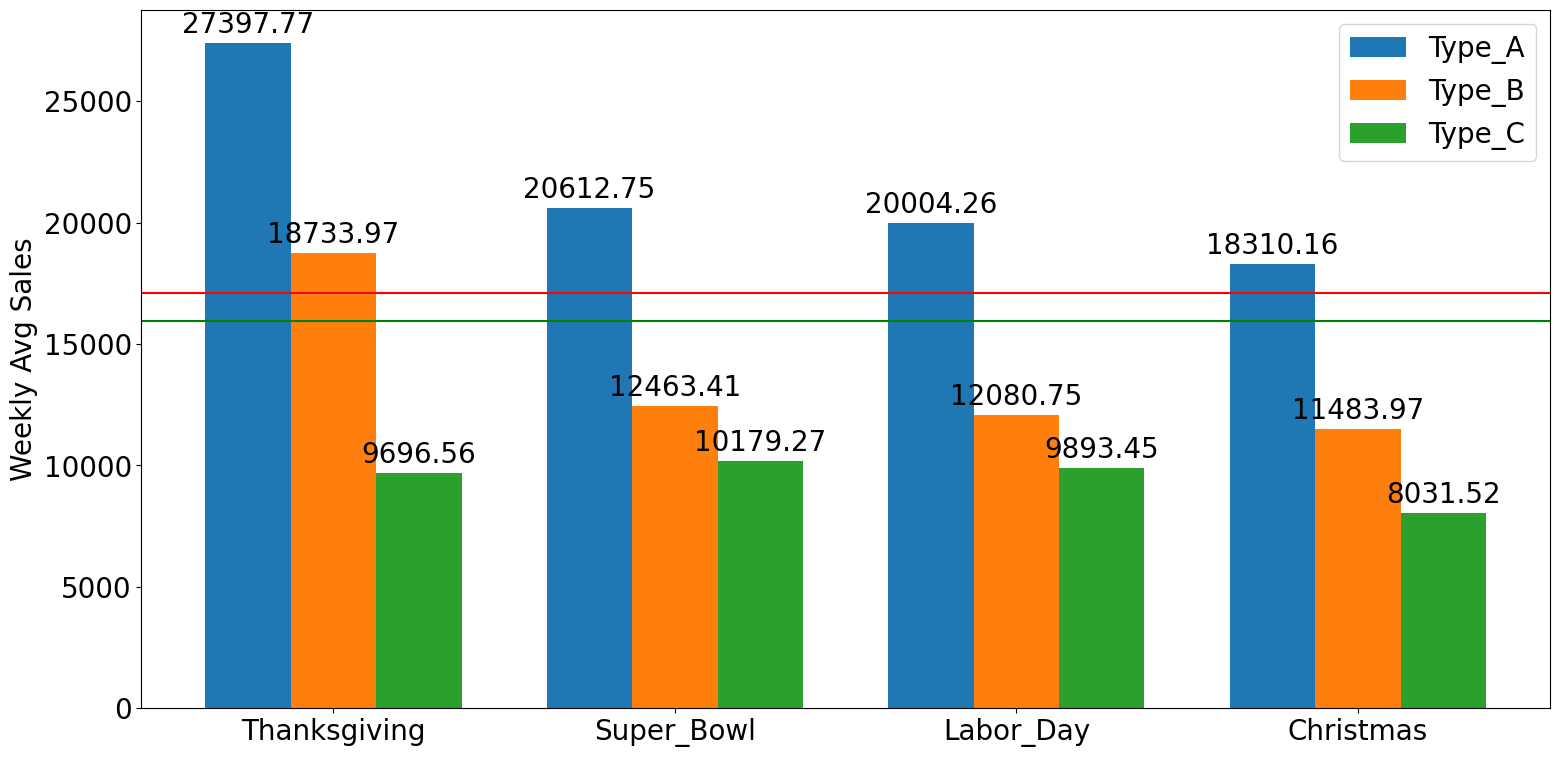

In [58]:
# Plotting avg wekkly sales according to holidays by types
# plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

من الرسم البياني اعلى متوسط مبيعات هو عيد الشكر وايضا في جميع العطلات ومتاجر ايه تحقق اعلى المبيعات

In [60]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
95373,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512,False,False,True,False
338013,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681,False,False,True,False
95425,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,False,False,True,False
337961,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,B,103681,False,False,True,False
135665,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,A,200898,False,False,True,False


# العلاقة بين الحجم والنوع

In [62]:
df_store.groupby('Type').describe()['Size'].round(2) # See the Size-Type relation

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


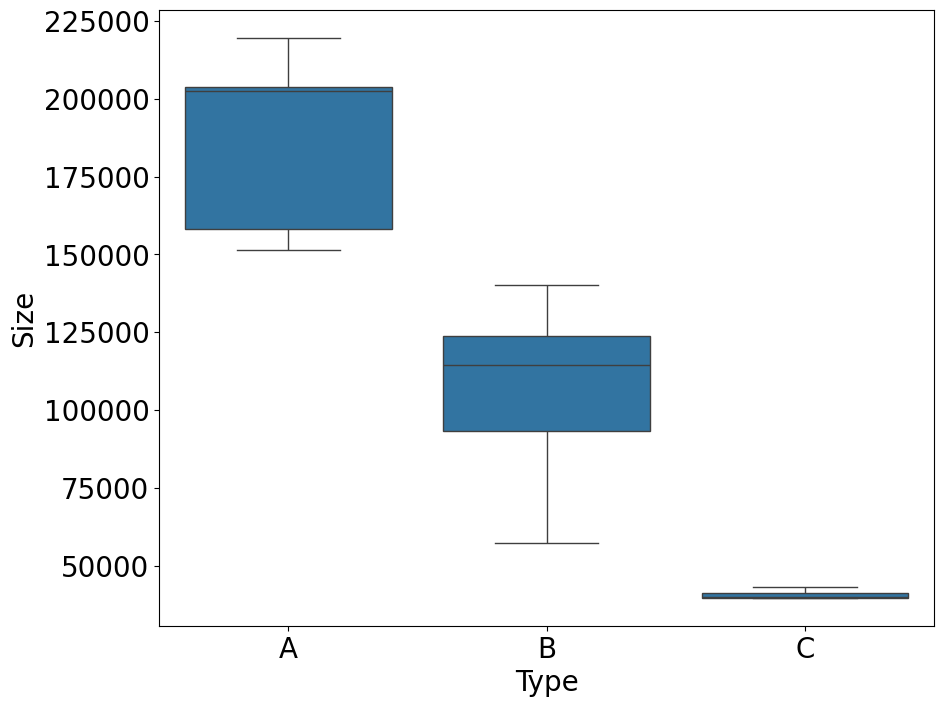

In [63]:
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)
plt.show()

تتوافق احجام المتاجر مع نسبة المبيعات كما هو متوقع 

# اعمدة تخفيض السعر 

هناك قيم فارغه ف بدلناها ب صفر افضل لمعرفة تأثير التخفيضات ع المبيعات

In [67]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64

In [68]:
df = df.fillna(0) # filling null's with 0

In [69]:
df.isna().sum() # last null check

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

In [70]:
df.describe() # to see weird statistical things

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787
std,12.787236,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


# تحليل اعمق في المبيعات

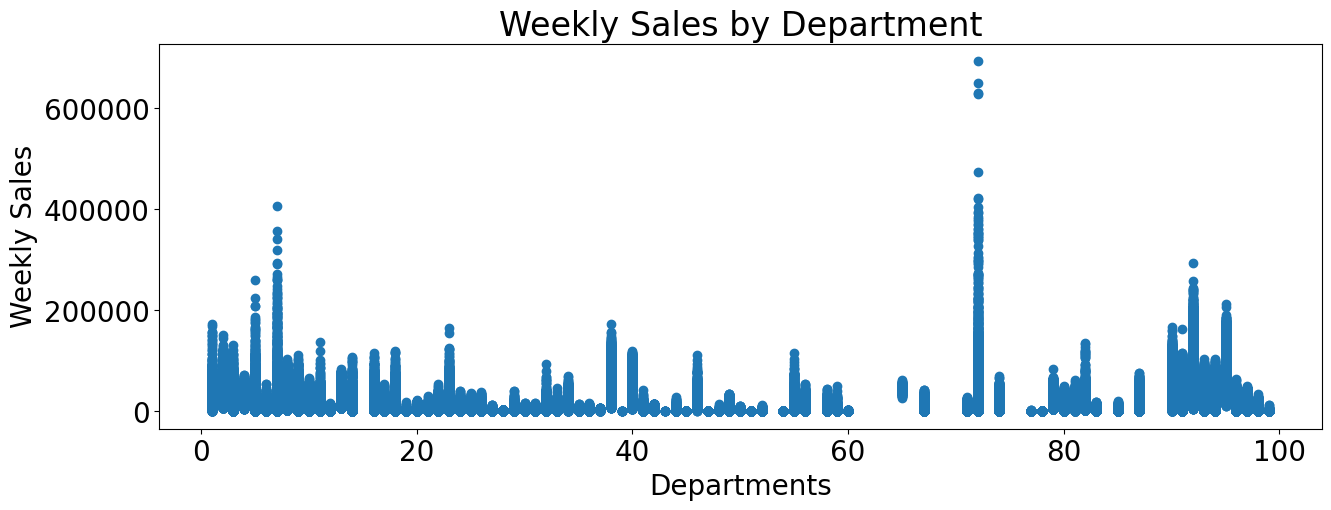

In [72]:
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

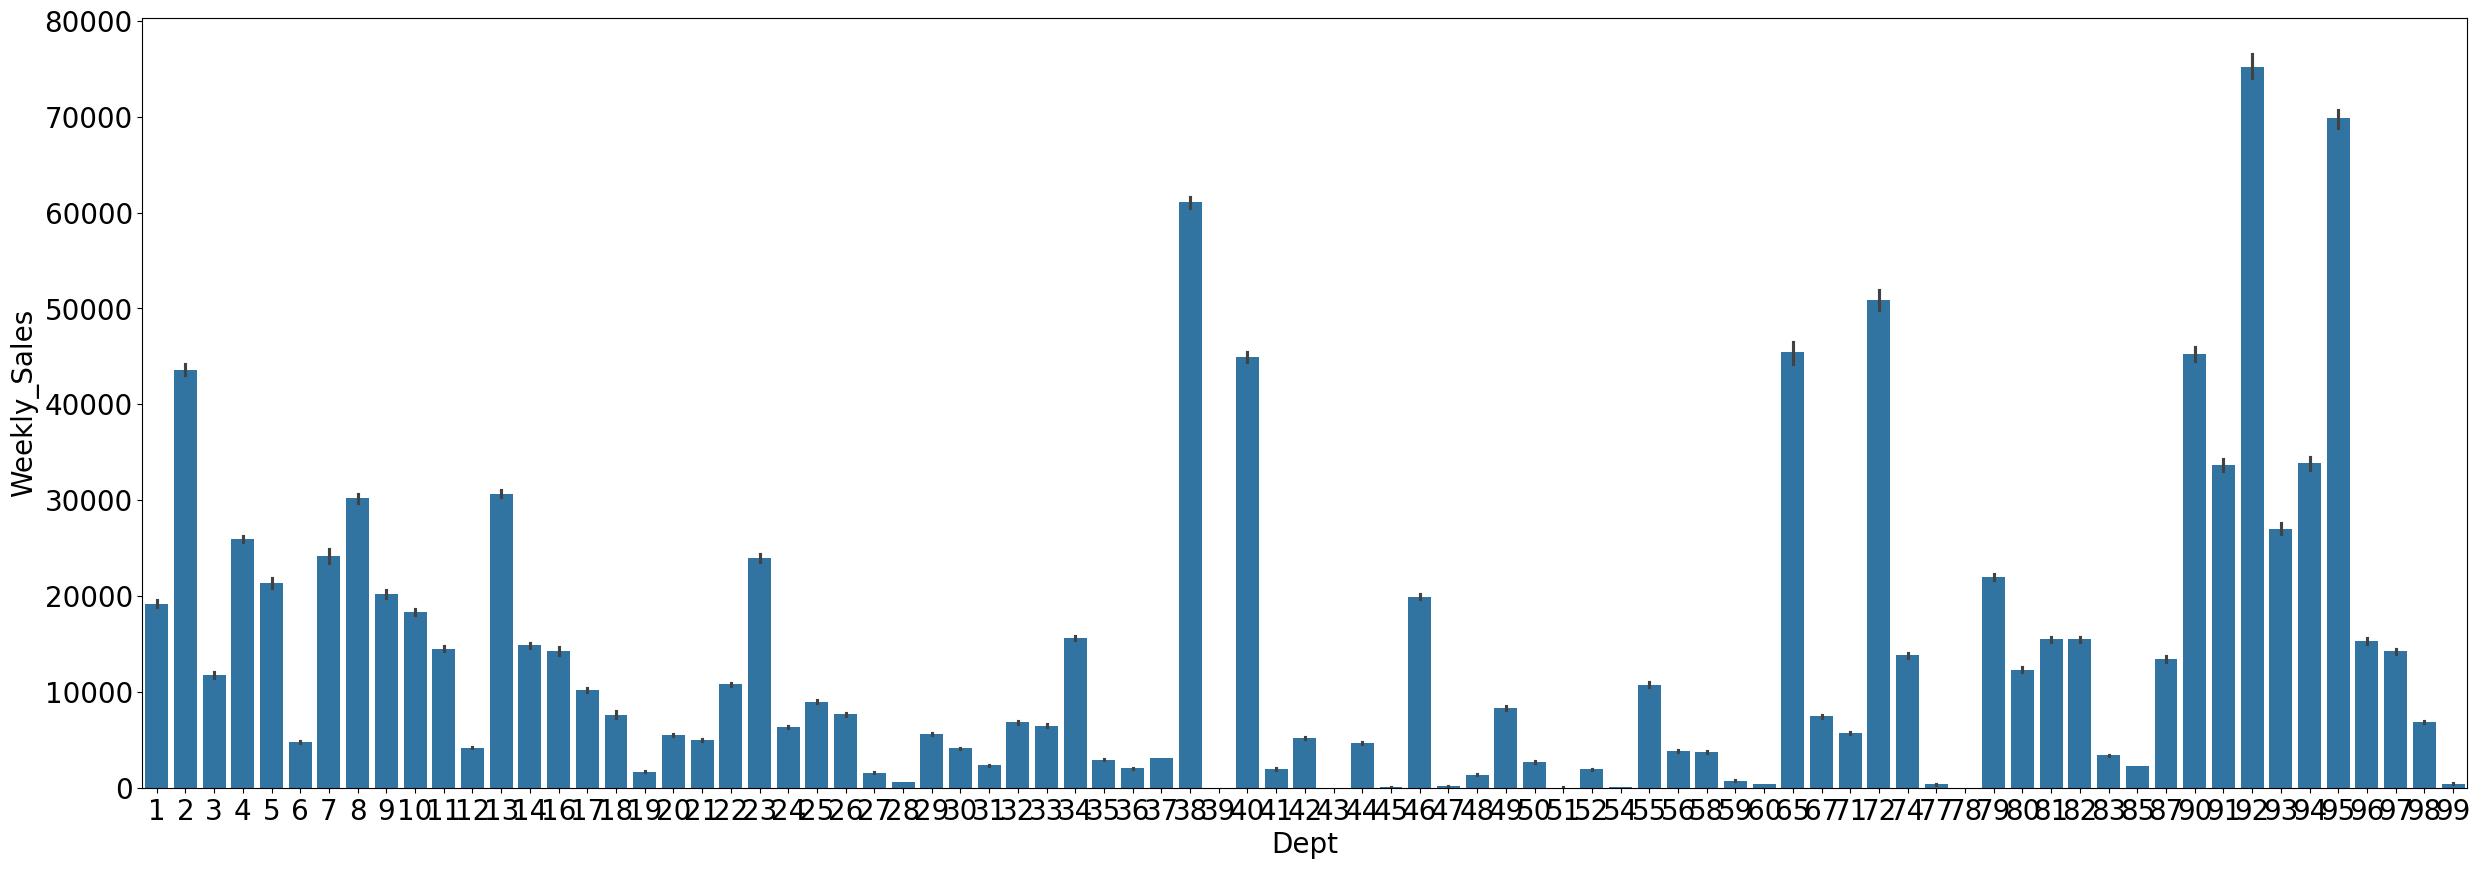

In [73]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)
plt.show()

من الرسم البياني الأول يظهر أن هناك قسمًا بين 60 و80 (أفترض أنه 72) يحقق قيم مبيعات أعلى ولكن عند حساب المتوسطات يتضح أن القسم 92 يمتلك متوسط مبيعات أعلى

 أعتقد أن القسم 72 موسمي، حيث يحقق مبيعات مرتفعة في بعض المواسم، لكن في المتوسط، القسم 92 يتفوق عليه

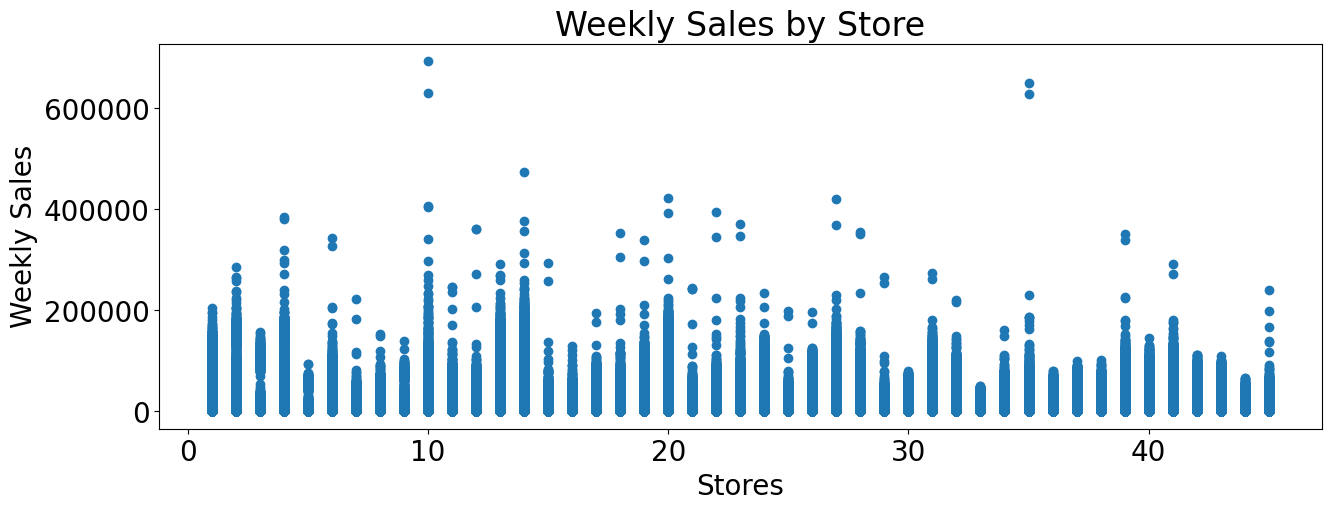

In [75]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

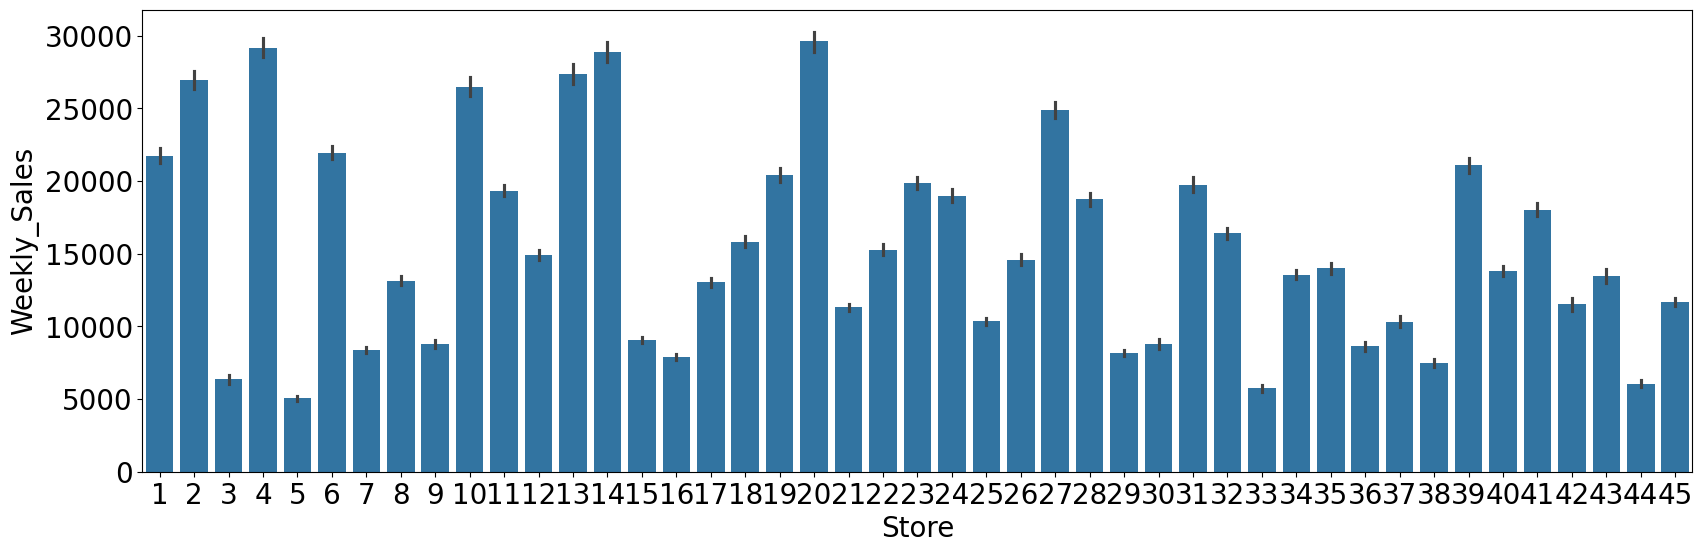

In [76]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)
plt.show()

نفس الشيء من الرسم البياني الاول حيث تحقق بعض المتاجر مبيعات اعلى ولكن المتوسط المجر رقم عشرين الافضل وبعده اربعة وثم اربعة عشر

# تغيير التاريخ الى تاريخ وقت وانشاء اعمدة جديدة

In [79]:
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime
df['week'] = df['Date'].dt.isocalendar().week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

In [80]:
df.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [81]:
df.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

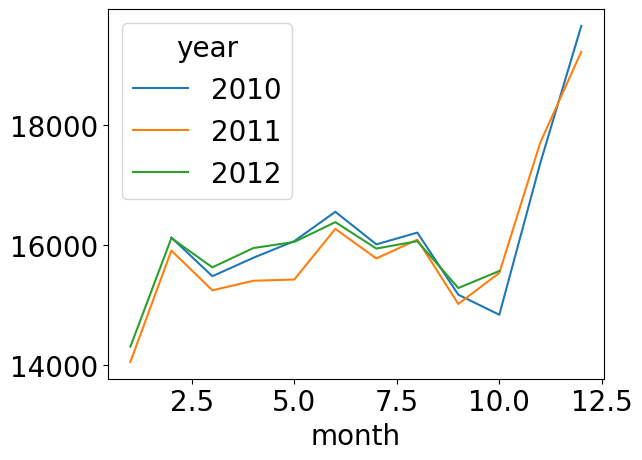

In [82]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()
plt.show()

من الرسم البياني يتضح أن مبيعات عام 2011 أقل بشكل عام من مبيعات عام 2010 وعند النظر إلى متوسط المبيعات، نلاحظ أن عام 2010 يمتلك قيمًا أعلى

ولكن عام 2012 لا يحتوي على بيانات لشهر نوفمبر وديسمبر اللذين يشهدان مبيعات أعلى

 وعلى الرغم من أن عام 2012 لا يحتوي على مبيعات آخر شهرين، فإن متوسطه قريب من متوسط عام 2010. ومن الاغلب أنه سيتصدر القائمة إذا تم إضافة نتائج 2012

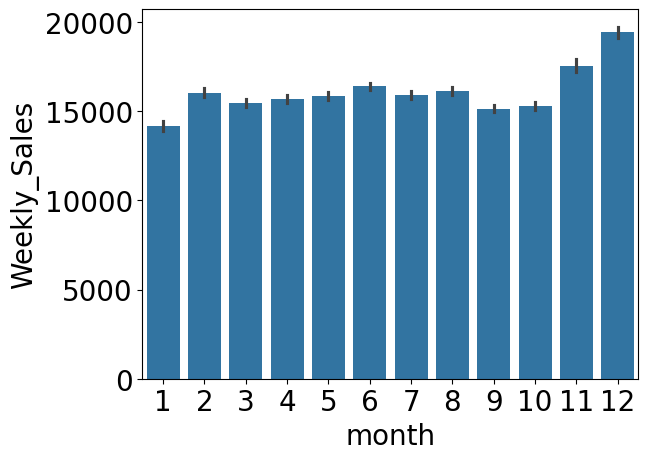

In [84]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)
plt.show()

من الرسم البياني نجد افضل المبيعات كانت في شهري ديسمبر ونوفمبر كما هو متوقع اما اعلى القيم كان بعطلة عيد الشكر

لكن عندما نأخذ المتوسط من الواضح ان شهر ديسمبر كان الافضل من حيث القيمة

In [86]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

اعلى خمس متوسطات مبيعات اسبوعية تنتمي من واحد الى اثنين اسابيع قبل عيدالميلاد وعيد الشكر والجمعة السوداء ونهاية شهر مايو 

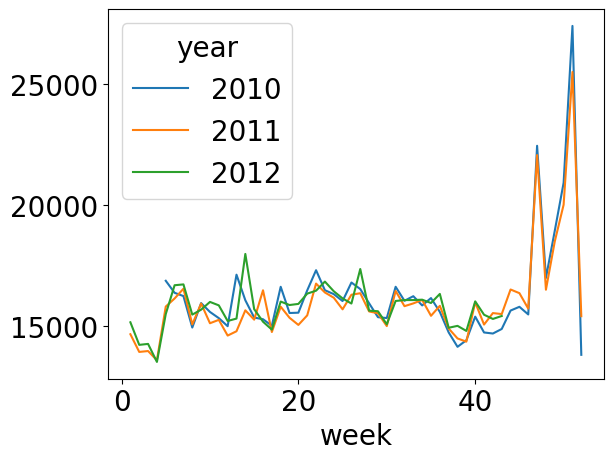

In [88]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()
plt.show()

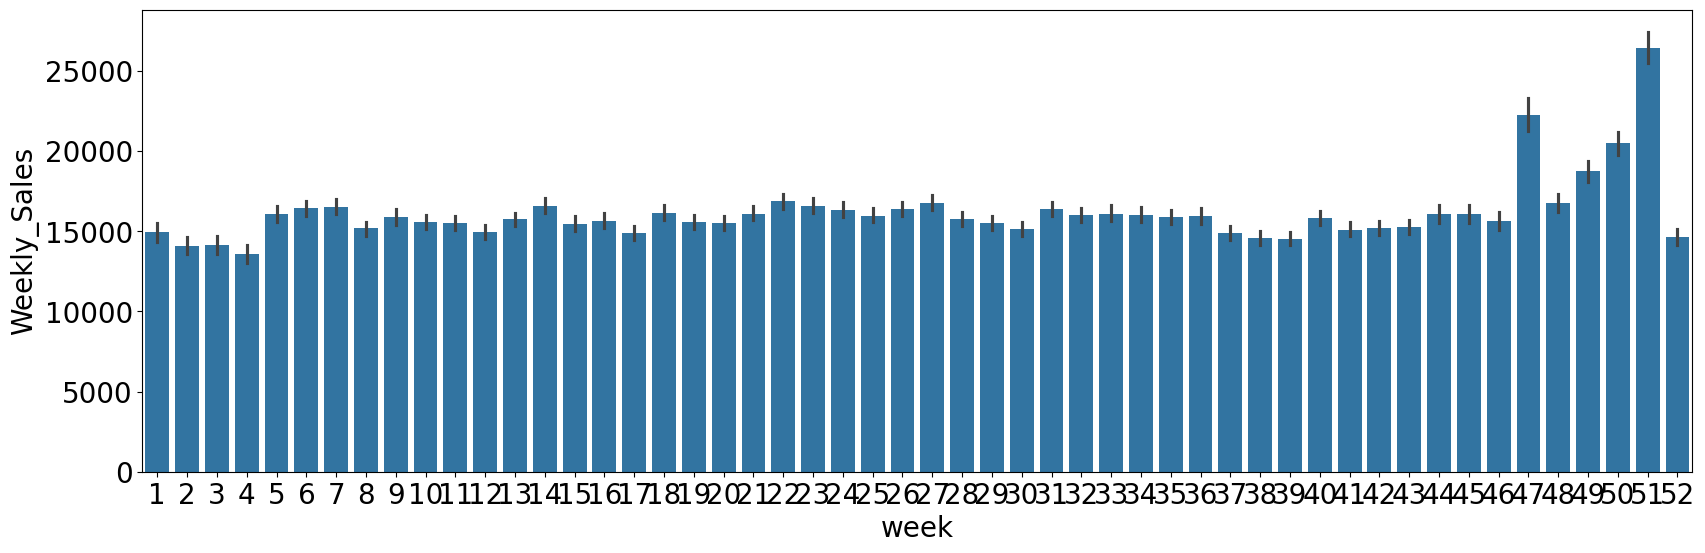

In [89]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)
plt.show()

من الرسم اعلاه نلاحظ ان الاسبوع الواحد والخمسين و السبعة والاربعين لديهما متوسطات اعلى بشكل ملحوظ مثل تأثيرات عيد الميلاد والشكر والجمعة السوداء

In [91]:
df.to_csv('clean_data.csv') # assign new data frame to csv for using after here

# النتائج والاستكشافات

# عملية التنظيف

البيانات لا تحتوي على الكثير من القيم المفقودة. تم فحص جميع الأعمدة 💫

اخترت الصفوف التي تحتوي على مبيعات أسبوعية أكبر من 0 💫

القيم السالبة تشكل 0.3% من البيانات، لذلك قمت بحذفها 💫

تم تغيير القيم الفارغة في الأعمدة الخاصة بالخصومات إلى صفر، لأنها كانت تكتب ك قيم فارغه 💫

# النتائج والاستكشافات

تحتوي البيانات على 45 متجرًا و81 قسمًا الأقسام ليست نفسها في جميع المتاجر


وعلى الرغم من أن القسم 72 يحقق قيم مبيعات أسبوعية أعلى، إلا أن القسم 92 هو الأفضل في المتوسط وهذا يُظهر أن بعض الأقسام لديها قيم أعلى بشكل موسمي مثل عيد الشكر وهذا يتناسب عندما ننظر إلى أعلى 5 مبيعات في البيانات، حيث تنتمي جميعها إلى القسم 72 في فترة عطلة عيد الشكر


وعلى الرغم من أن المتاجر 10 و35 تحقق أحيانًا مبيعات أسبوعية أعلى، إلا أن المتاجر 20 و4 في المتوسط تحتلان المركزين الأول والثاني وهذا يعني أن بعض المناطق تحقق مبيعات موسمية أعلى


 A وB وC حسب حجمها. تقريبًا نصف المتاجر أكبر من 150000 وتم تصنيفها كنوع A. وحسب النوع، تتغير مبيعات المتاجر


كما هو متوقع، مبيعات العطلات أعلى من المبيعات في الأيام العادية

يعتبر عيد الميلاد من آخر أيام السنة، ولكن الناس عمومًا يتسوقون في الأسبوع 51. لذا، عند النظر إلى إجمالي مبيعات العطلات، نجد أن عيد الشكر حقق أعلى المبيعات بين العطلات التي تم تحديدها من قبل Walmart


عام 2010 حقق مبيعات أعلى من 2011 و2012. ولكن، مبيعات نوفمبر وديسمبر غير موجودة في بيانات عام 2012. حتى بدون أشهر المبيعات الأعلى، فإن مبيعات 2012 ليست أقل بشكل ملحوظ من 2010، لذا بعد إضافة آخر شهرين، قد يتصدر 2012 القائمة

من الواضح أن الأسبوع 51 و47 يحققان قيمًا أعلى، وتتبعهما الأسابيع 50 و48. ومن المثير للاهتمام أن خامس أعلى مبيعات تخص الأسبوع 22 من العام. هذه النتائج تُظهر أن عيد الميلاد، عيد الشكر، والجمعة السوداء أكثر أهمية من الأسابيع الأخرى بالنسبة للمبيعات، وأن أهم وقت بعدهم هو الأسبوع 22 من العام الذي ينتهي في مايو

مبيعات يناير أقل بشكل كبير من الأشهر الأخرى، وهذا نتيجة لمبيعات نوفمبر وديسمبر المرتفعة. بعد شهرين من المبيعات المرتفعة، يفضل الناس دفع أقل في يناير



In [97]:
pd.options.display.max_columns=100 # to see columns 

In [98]:
df = pd.read_csv('clean_data.csv')

In [99]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [100]:
df['Date'] = pd.to_datetime(df['Date']) # changing datetime to divide if needs

# ترميز البيانات

لمعالجة البيانات بنقوم بتغيير قيم العطلات المنطقية لزيرو ون واستبدال نوع المتاجر ل ون تو ثري

In [103]:
df_encoded = df.copy() # to keep original dataframe taking copy of it

In [104]:
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
df_encoded['Type'] = df_encoded['Type'].replace(type_group)

In [105]:
df_encoded['Super_Bowl'] = df_encoded['Super_Bowl'].astype(bool).astype(int) # changing T,F to 0-1

In [106]:
df_encoded['Thanksgiving'] = df_encoded['Thanksgiving'].astype(bool).astype(int) # changing T,F to 0-1

In [107]:
df_encoded['Labor_Day'] = df_encoded['Labor_Day'].astype(bool).astype(int) # changing T,F to 0-1

In [108]:
df_encoded['Christmas'] = df_encoded['Christmas'].astype(bool).astype(int) # changing T,F to 0-1

In [109]:
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int) # changing T,F to 0-1

In [110]:
df_new = df_encoded.copy() # taking the copy of encoded df to keep it original

# ملاحظة التفاعلات بين الفيتشرز

اولا ساحذف اعمدة العطلات من بياناتي ولا استخدمها 

In [113]:
drop_col = ['Super_Bowl','Labor_Day','Thanksgiving','Christmas']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns

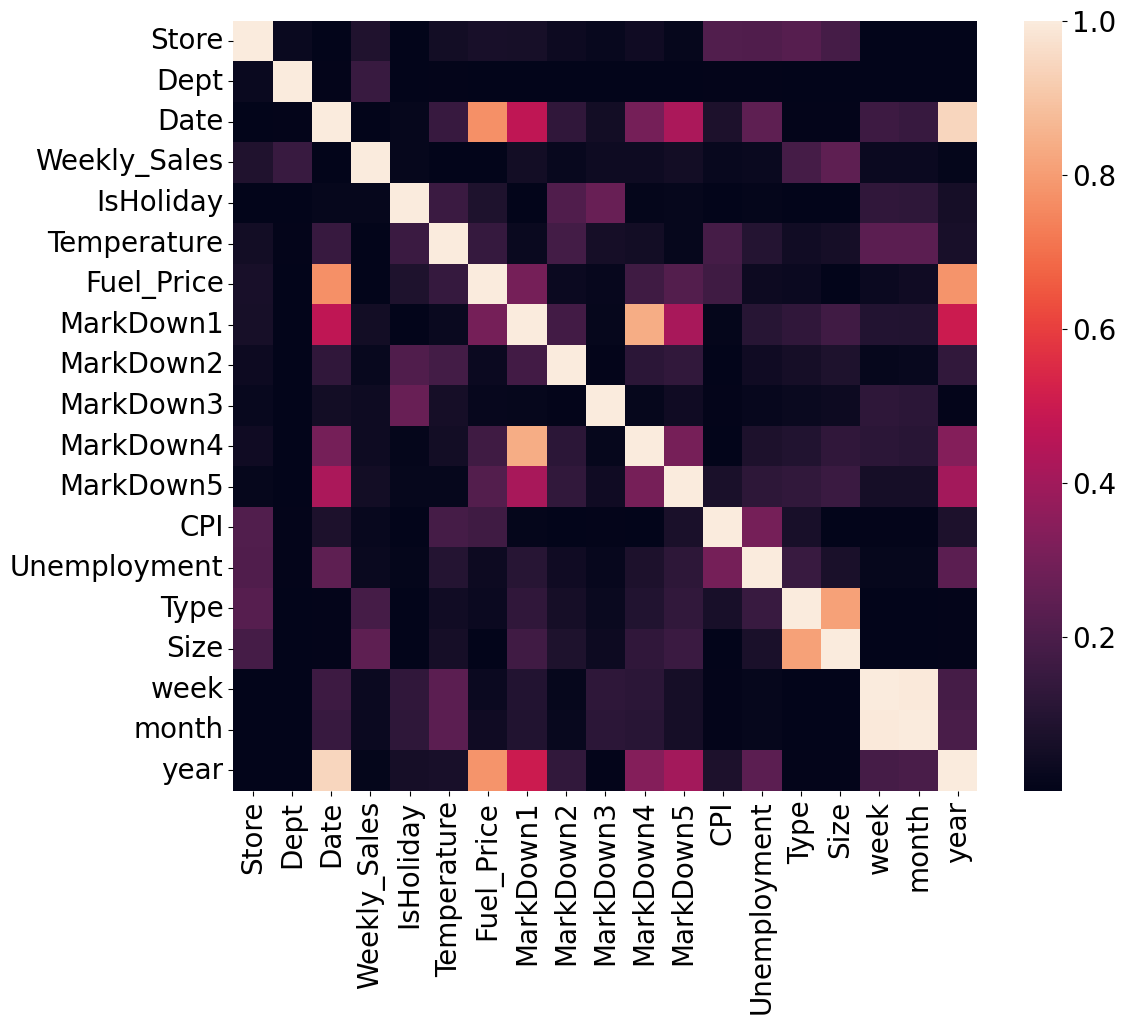

In [114]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    # To see the correlations
plt.show()

درجة الحرارة، البطالة، ومؤشر أسعار المستهلك أيضًا السي بي اي ليس لها تأثير كبير على المبيعات الأسبوعية، لذا سأقوم بحذفها

Markdown 4 و 5 مرتبطان ارتباطًا كبيرًا بـ Markdown 1

لذا سأحذفهُمَا أيضًا قد يسبب هذا مشكلة التعدد الخطي 

(multicollinearity) لذلك، سأبدأ أولاً بدونها

In [116]:
drop_col = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns

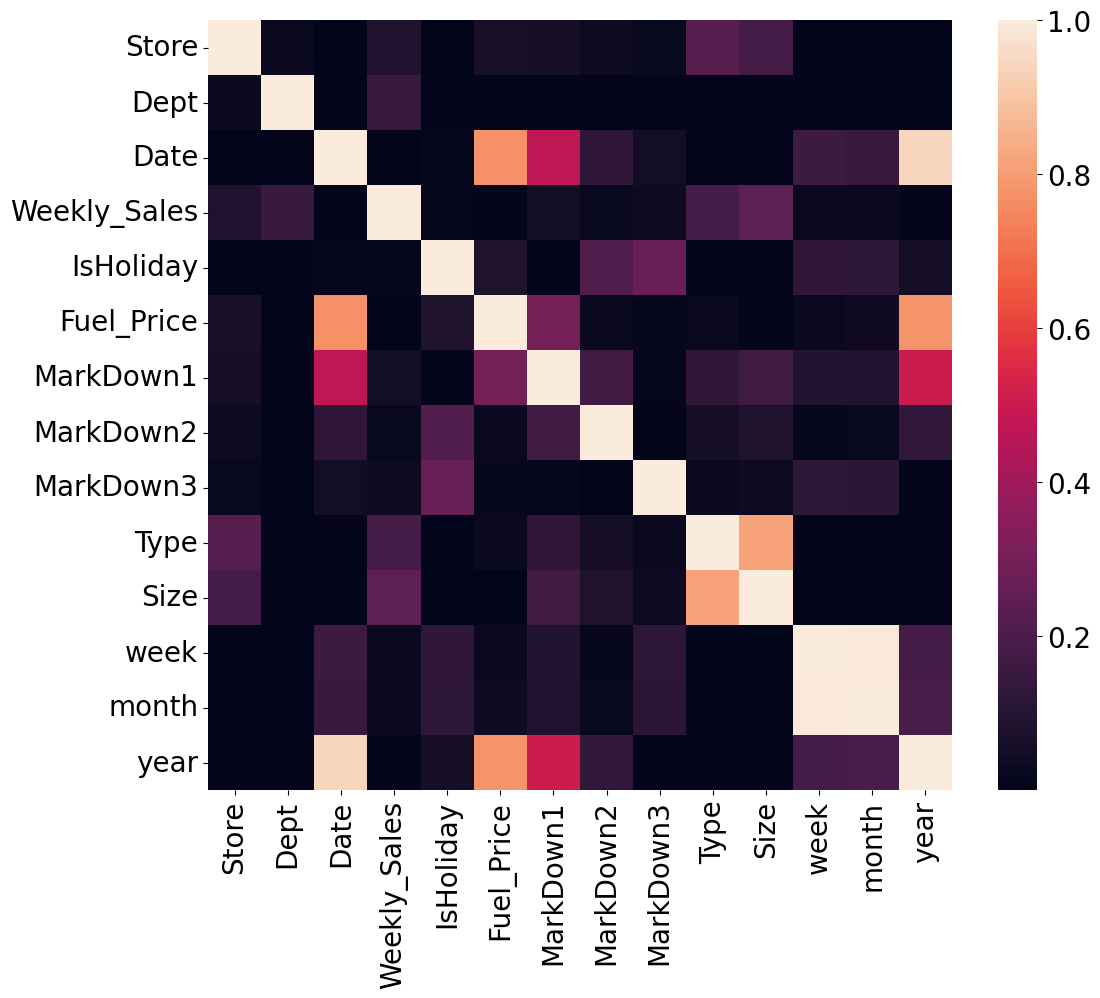

In [117]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    # To see the correlations without dropping columns
plt.show()

يرتبط الحجم والنوع ارتباط وثيق بالمبيعات الاسبوعية كما يرتبط القسم والمتجر بالمبيعات

In [119]:
df_new = df_new.sort_values(by='Date', ascending=True) # sorting according to date

# انشاء تقسيمات التدريب والاختبار

لدينا في عمود التاريخ قيم مستمره لذلك قسمت البيانات يدويا 

In [122]:
train_data = df_new[:int(0.7*(len(df_new)))] # taking train part
test_data = df_new[int(0.7*(len(df_new))):] # taking test part

target = "Weekly_Sales"
used_cols = [c for c in df_new.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [123]:
X = df_new[used_cols] # to keep train and test X values together

عندنا معلومات كافيه في التاريخ مثل اسبوع السنة لذلك حذفت اعمدة التاريخ

In [125]:
X_train = X_train.drop(['Date'], axis=1) # dropping date from train
X_test = X_test.drop(['Date'], axis=1) # dropping date from test

# تعريف المقياس الدالة

مقياسنا لا يُحسب كما هو افتراضي من النماذج الجاهزة إنه خطأ مرجح، لذا سأستخدم الدالة أدناه لحسابه

In [128]:
def wmae_test(test, pred): # WMAE for test 
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

# راندوم الغابات العشوائية 

GridSearch لضبط المُقدِّر، يمكنني استخدام       

لكنه يستغرق وقتًا طويلاً نظرًا لحجم البيانات الكبير الذي يحتوي على العديد من الصفوف والأعمدة. لذلك، اخترت ضبط معلمات المُقدِّر يدويًا، حيث قمت بتغيير المعلمات في كل مرة لمحاولة العثور على أفضل نتيجة

In [131]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()



#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

In [132]:
wmae_test(y_test, y_pred_test)

5697.712824122053

بالنسبة للتجربة الاولى الخطأ المرجح هو تقريبا 5850

# لمعرفة اهمية الفيتشرز

In [135]:
X = X.drop(['Date'], axis=1) #dropping date column from X

Feature ranking:
1. feature 1 (0.734834)
2. feature 8 (0.103608)
3. feature 0 (0.058842)
4. feature 7 (0.039401)
5. feature 9 (0.021299)
6. feature 3 (0.018655)
7. feature 10 (0.008636)
8. feature 6 (0.005390)
9. feature 4 (0.003045)
10. feature 5 (0.002715)
11. feature 2 (0.002032)
12. feature 11 (0.001543)


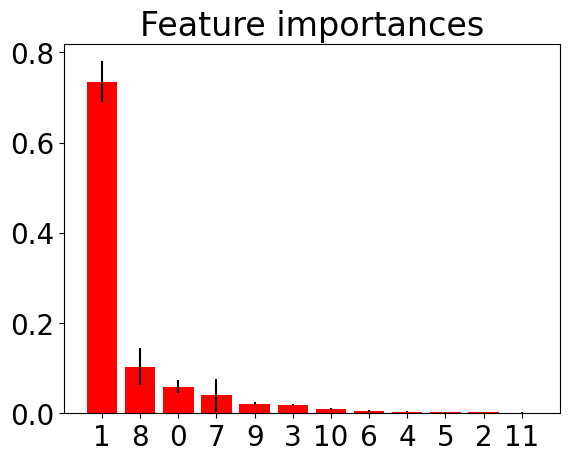

In [136]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

بعد م شفنا اهمية الميزه قمت بحذف اربع ميزات اقل اهمية وجربت النموذج وكان افضل نتيجة عندما حذفت عمود الشهر الي يرتبط كثيرا مع عمود الاسبوع

In [138]:
X1_train = X_train.drop(['month'], axis=1) # dropping month
X1_test = X_test.drop(['month'], axis=1)

# المودل بدون الشهر

In [140]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X1_train, y_train)

# predictions on train set
y_pred = pipe.predict(X1_train)

# predictions on test set
y_pred_test = pipe.predict(X1_test)

In [141]:
wmae_test(y_test, y_pred_test)

5450.408821519322

لاباس نتائجة افضل

# المودل مع البيانات كامل

الان بنتأكد ان المودل سيتعلم من الاعمدة التي حذفناها سابقا لذلك سأطبق على البيانات المشفره بالكامل

In [145]:
# splitting train-test to whole dataset
train_data_enc = df_encoded[:int(0.7*(len(df_encoded)))]
test_data_enc = df_encoded[int(0.7*(len(df_encoded))):]

target = "Weekly_Sales"
used_cols1 = [c for c in df_encoded.columns.to_list() if c not in [target]] # all columns except price

X_train_enc = train_data_enc[used_cols1]
X_test_enc = test_data_enc[used_cols1]
y_train_enc = train_data_enc[target]
y_test_enc = test_data_enc[target]

In [146]:
X_enc = df_encoded[used_cols1] # to get together train,test splits

In [147]:
X_enc = X_enc.drop(['Date'], axis=1) #dropping date column for whole X

In [148]:
X_train_enc = X_train_enc.drop(['Date'], axis=1) # dropping date from train and test
X_test_enc= X_test_enc.drop(['Date'], axis=1)

In [149]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc, y_train_enc)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc)

In [150]:
wmae_test(y_test_enc, y_pred_test_enc)

2660.585435168574

We found better results for whole data, it means our model can learn from columns which I dropped before.

# اهمية الفيتشرز لمجموعة البيانات المشفره بالكامل

Feature ranking:
1. feature 1 (0.740225)
2. feature 13 (0.074453)
3. feature 12 (0.041055)
4. feature 0 (0.033746)
5. feature 10 (0.030454)
6. feature 11 (0.017543)
7. feature 18 (0.012157)
8. feature 3 (0.011184)
9. feature 4 (0.010293)
10. feature 19 (0.005989)
11. feature 7 (0.004640)
12. feature 9 (0.004178)
13. feature 8 (0.003567)
14. feature 5 (0.003513)
15. feature 6 (0.002597)
16. feature 20 (0.001178)
17. feature 16 (0.001030)
18. feature 2 (0.000953)
19. feature 17 (0.000670)
20. feature 15 (0.000303)
21. feature 14 (0.000275)


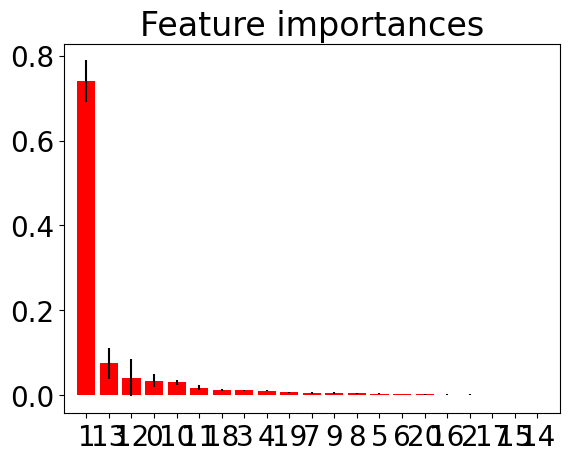

In [153]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")

for f in range(X_enc.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_enc.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_enc.shape[1]), indices)
plt.xlim([-1, X_enc.shape[1]])
plt.show()

وفقا لاهمية الفيتشرز حذفت  بعض الاعمدة مره اخرى

In [155]:
df_encoded_new = df_encoded.copy() # taking copy of encoded data to keep it without change.
df_encoded_new.drop(drop_col, axis=1, inplace=True)

# المودل ع حسب اهمية الميزه

In [157]:
#train-test splitting
train_data_enc_new = df_encoded_new[:int(0.7*(len(df_encoded_new)))]
test_data_enc_new = df_encoded_new[int(0.7*(len(df_encoded_new))):]

target = "Weekly_Sales"
used_cols2 = [c for c in df_encoded_new.columns.to_list() if c not in [target]] # all columns except price

X_train_enc1 = train_data_enc_new[used_cols2]
X_test_enc1 = test_data_enc_new[used_cols2]
y_train_enc1 = train_data_enc_new[target]
y_test_enc1 = test_data_enc_new[target]

#droping date from train-test
X_train_enc1 = X_train_enc1.drop(['Date'], axis=1)
X_test_enc1= X_test_enc1.drop(['Date'], axis=1)

In [158]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=40,
                           max_features = 'log2',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc1, y_train_enc1)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc1)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc1)

In [159]:
pipe.score(X_test_enc1,y_test_enc1)

0.735025800467954

In [160]:
wmae_test(y_test_enc1, y_pred_test_enc)

2018.8987478432969

لقد وجدت افضل نتائج عندما اخترت الميزه من المجموعه المشفره كامل

# المودل بدون عمود الشهر المحذوف

With the same dateset before, I try to model again without month column. 

In [164]:
df_encoded_new1 = df_encoded.copy()
df_encoded_new1.drop(drop_col, axis=1, inplace=True)

In [165]:
df_encoded_new1 = df_encoded_new1.drop(['Date'], axis=1)

In [166]:
df_encoded_new1 = df_encoded_new1.drop(['month'], axis=1)

In [167]:
#train-test split
train_data_enc_new1 = df_encoded_new1[:int(0.7*(len(df_encoded_new1)))]
test_data_enc_new1 = df_encoded_new1[int(0.7*(len(df_encoded_new1))):]

target = "Weekly_Sales"
used_cols3 = [c for c in df_encoded_new1.columns.to_list() if c not in [target]] # all columns except price

X_train_enc2 = train_data_enc_new1[used_cols3]
X_test_enc2 = test_data_enc_new1[used_cols3]
y_train_enc2 = train_data_enc_new1[target]
y_test_enc2 = test_data_enc_new1[target]

In [168]:
#modeling part
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc2, y_train_enc2)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc2)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc2)

In [169]:
pipe.score(X_test_enc2,y_test_enc2)

0.7104703970074872

In [170]:
wmae_test(y_test_enc2, y_pred_test_enc)

2191.378572764418

لم تعطي نتائج افضل من قبل

In [172]:
df_results = pd.DataFrame(columns=["Model", "Info",'WMAE']) # result df for showing results together

In [173]:
# writing results to df
new_row = pd.DataFrame({
    "Model": ['RandomForestRegressor'],
    "Info": ['w/out divided holiday columns'],
    "WMAE": [5850]
})
df_results = pd.concat([df_results, new_row], ignore_index=True)

In [174]:
import pandas as pd

# إنشاء صفوف جديدة كـ DataFrame
new_rows = pd.DataFrame([
    {"Model": 'RandomForestRegressor', "Info": 'w/out month column', "WMAE": 5494},
    {"Model": 'RandomForestRegressor', "Info": 'whole data', "WMAE": 2450},
    {"Model": 'RandomForestRegressor', "Info": 'whole data with feature selection', "WMAE": 1801},
    {"Model": 'RandomForestRegressor', "Info": 'whole data with feature selection w/out month', "WMAE": 2093}
])

# دمج DataFrame القديم مع الصفوف الجديدة
df_results = pd.concat([df_results, new_rows], ignore_index=True)

In [175]:
df_results

,Model,Info,WMAE
0,RandomForestRegressor,w/out divided holiday columns,5850
1,RandomForestRegressor,w/out month column,5494
2,RandomForestRegressor,whole data,2450
3,RandomForestRegressor,whole data with feature selection,1801
4,RandomForestRegressor,whole data with feature selection w/out month,2093


افضل النتائج كانت لمجموعة البيانات الكاملة مع اختيار الميزه والان سأستخدم نماذج السلاسل الزمنية

# مودل السلاسل الزمنية 

In [178]:
df.head() # to see my data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,True,False,False,False,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,False,False,False,False,7,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,False,False,False,False,8,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,False,False,False,False,9,3,2010


In [179]:
df["Date"] = pd.to_datetime(df["Date"]) #changing data to datetime for decomposing

In [180]:
df.set_index('Date', inplace=True) #seting date as index

# المبيعات بلوت

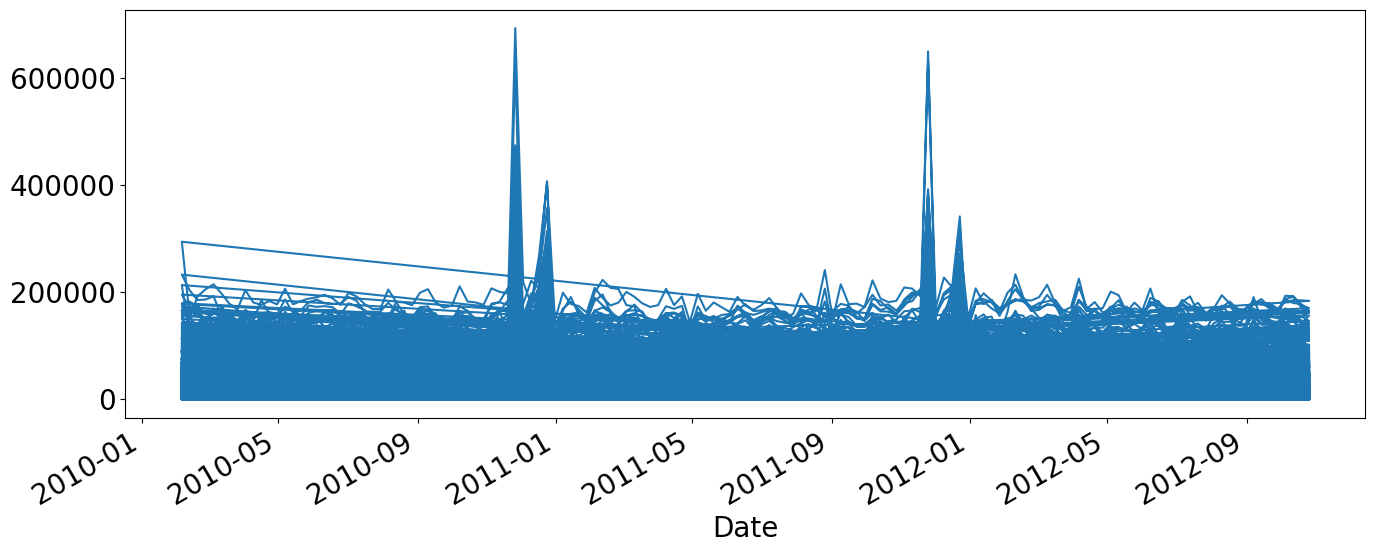

In [182]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

بهذه البيانات يوجد كثير من القيم المتشابهه لذا سأجمعها معا اسبوعيا

In [214]:
df

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-12,1,1,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315,True,False,False,False,6,2,2010
2010-02-19,1,1,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315,False,False,False,False,7,2,2010
2010-02-26,1,1,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315,False,False,False,False,8,2,2010
2010-03-05,1,1,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315,False,False,False,False,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,98,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,False,False,False,False,39,9,2012
2012-10-05,45,98,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221,False,False,False,False,40,10,2012
2012-10-12,45,98,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221,False,False,False,False,41,10,2012


In [218]:
df_week = df.resample('W').mean(numeric_only=True)

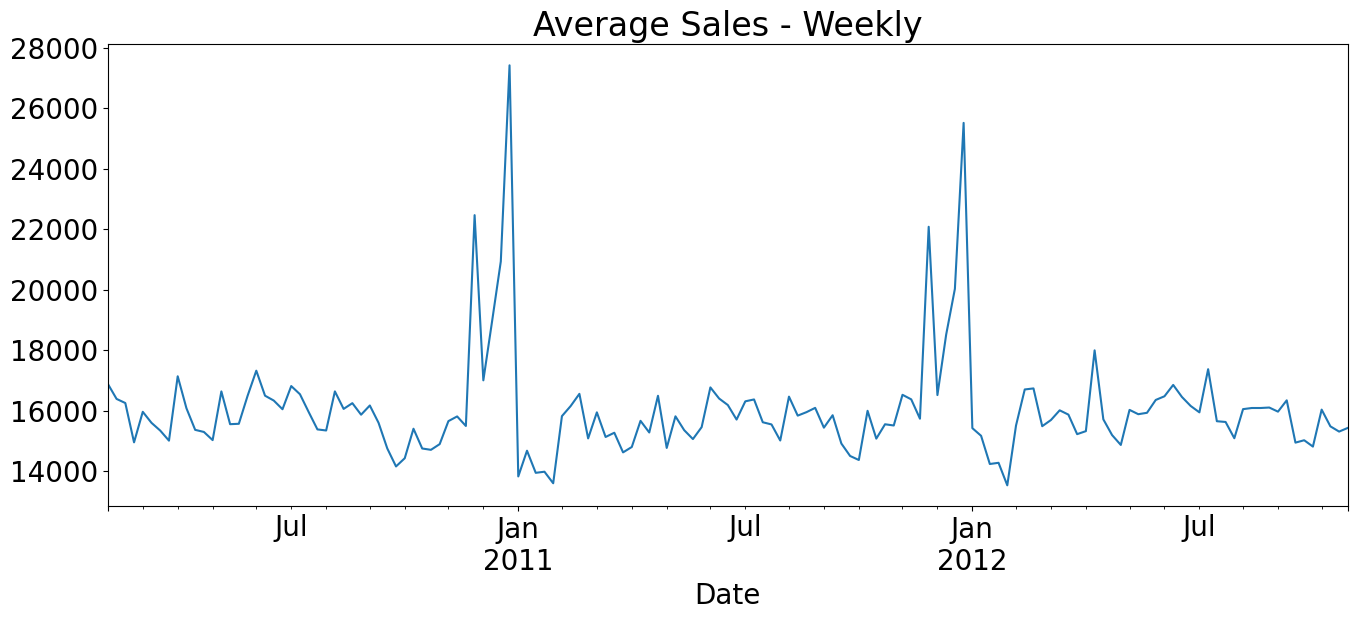

In [220]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

لانحنا جمعنا البيانات اسبوعيا بإستطاعتنا رؤية متوسط المبيعات بوضوح ولرؤية النمط الشهري قمنا باعادة اخذ عينات من بياناتي الى الشهرية

In [225]:
df_month = df.resample('MS').mean(numeric_only=True) # resampling as monthly

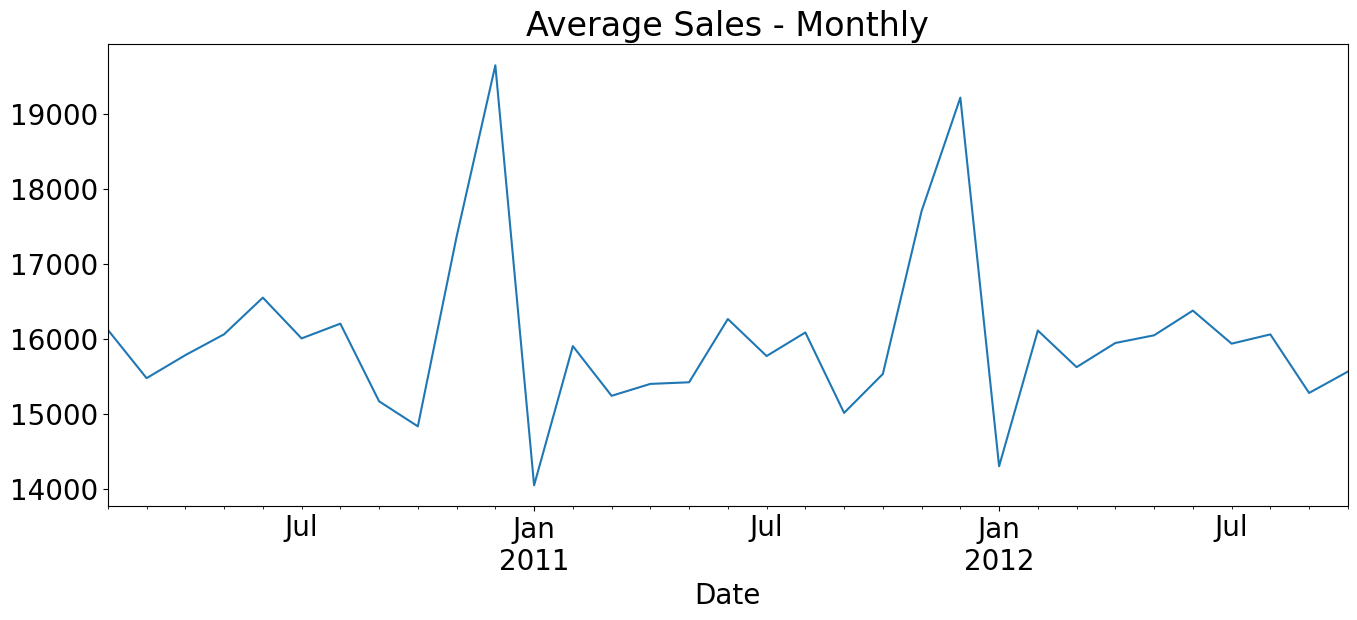

In [227]:
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

عندما حولنا البيانات الى شهرية ادركت انحنا فقدنا بعض الانماط في البيانات الاسبوعية لذلك ساستمر بإستخدام البيانات المعاد اخذ العينات منها بشكل اسبوعي

# مراقبة المتوسط والانحراف المعياري لمدة اسبوعين

بياناتي غير ثابته لذلك اريد العثور ع نسخة اكثر ثبات منها

In [232]:
# finding 2-weeks rolling mean and std
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

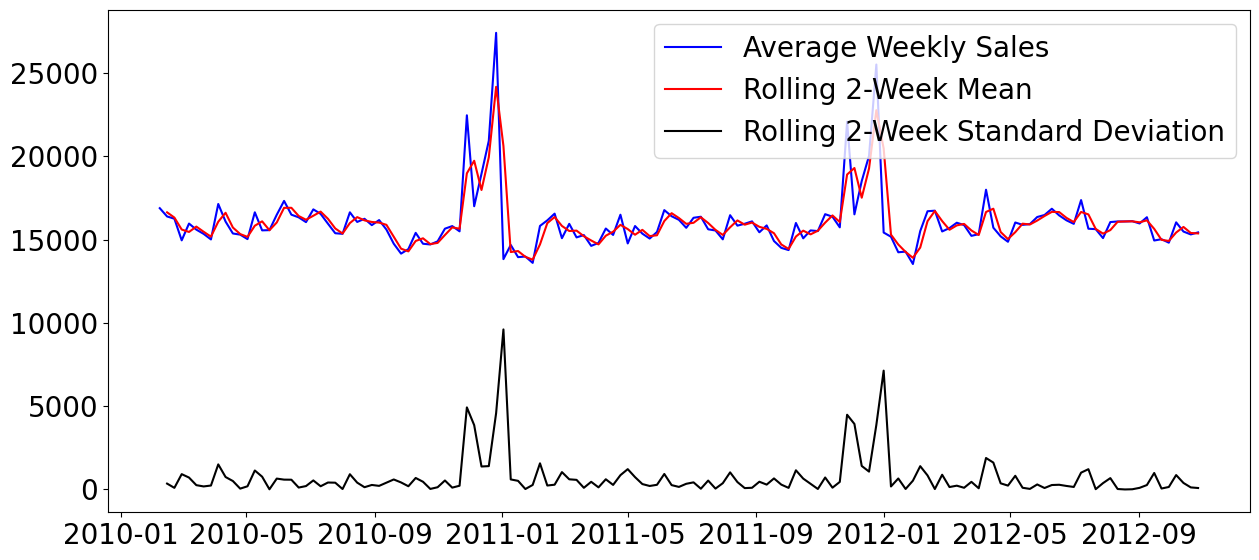

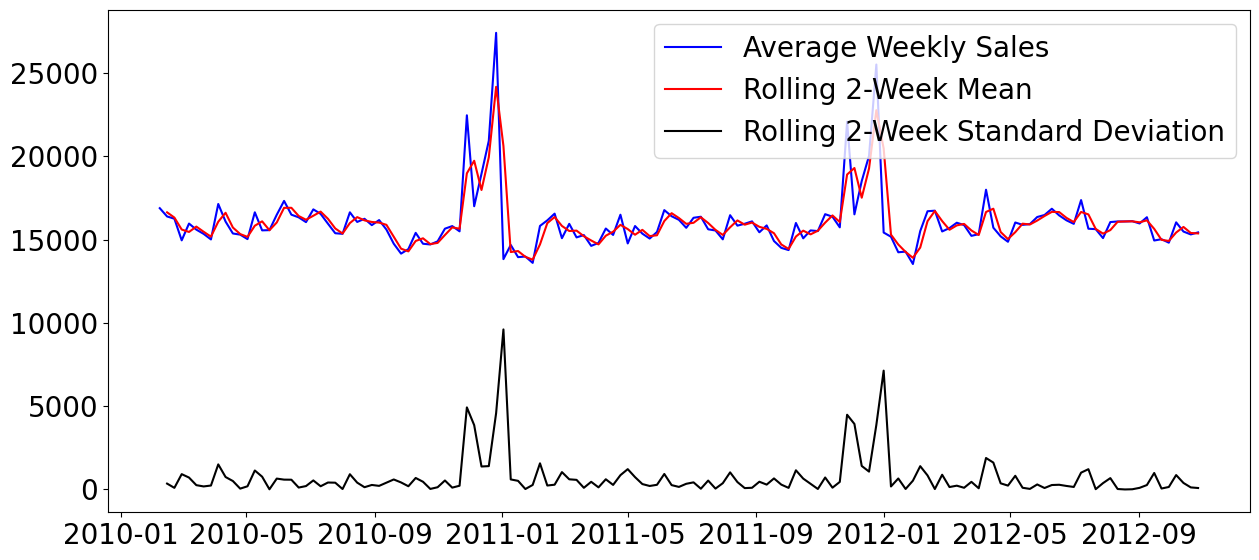

In [236]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()
plt.show()

# تدريب واختبار لتقسيم البيانات الاسبوعية

قسمنا يدوي وليس عشوائي لانها مستمره

In [240]:
train_data = df_week[:int(0.7*(len(df_week)))] 
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 21)
Test: (43, 21)


In [242]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] # all columns except price

# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

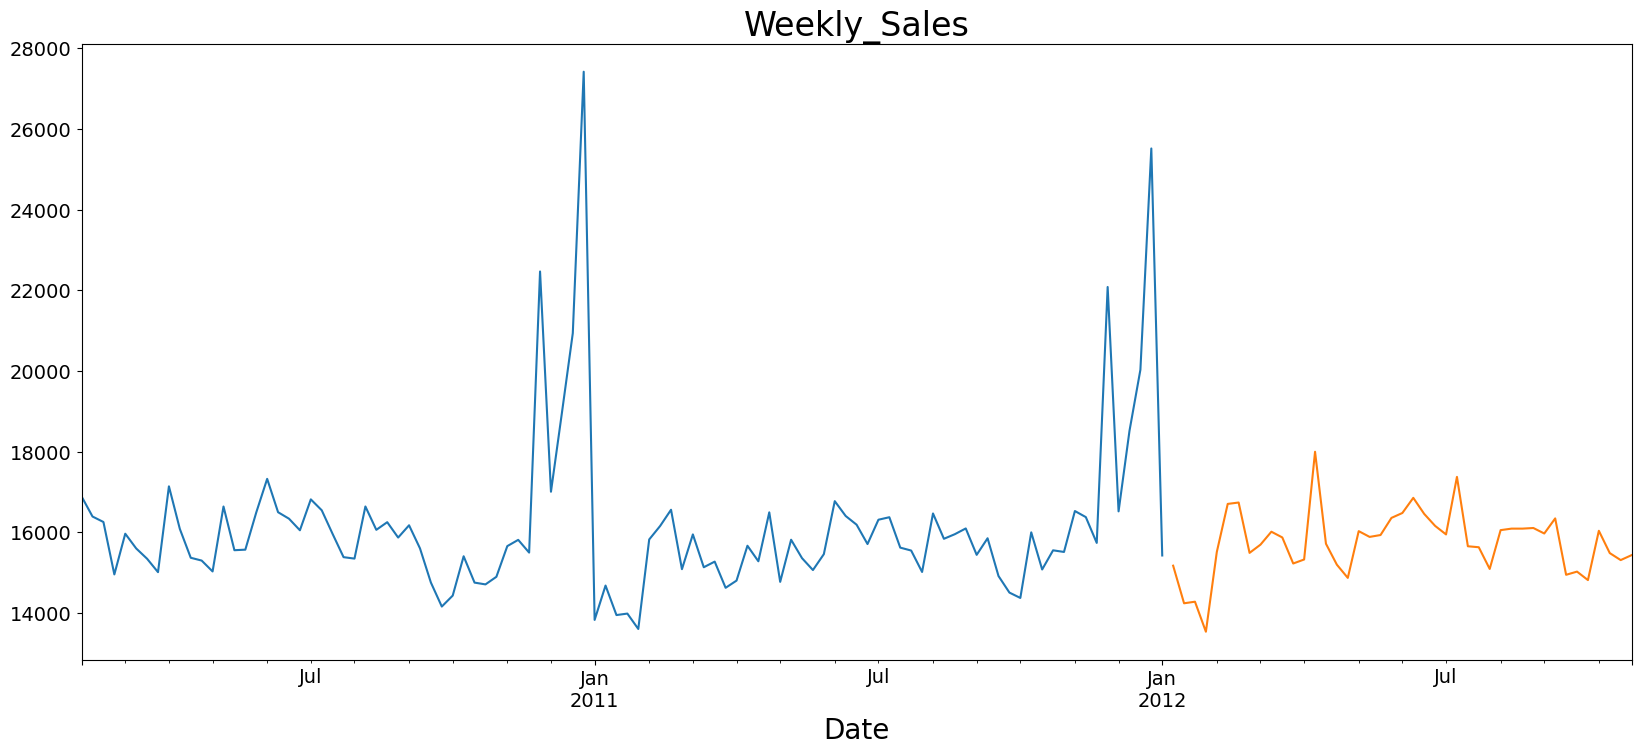

In [244]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

الازرق بيانات التدريب والاصفر حق الاختبار

# تحليل البيانات الاسبوعية للمراقبة الموسمية

In [248]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data 

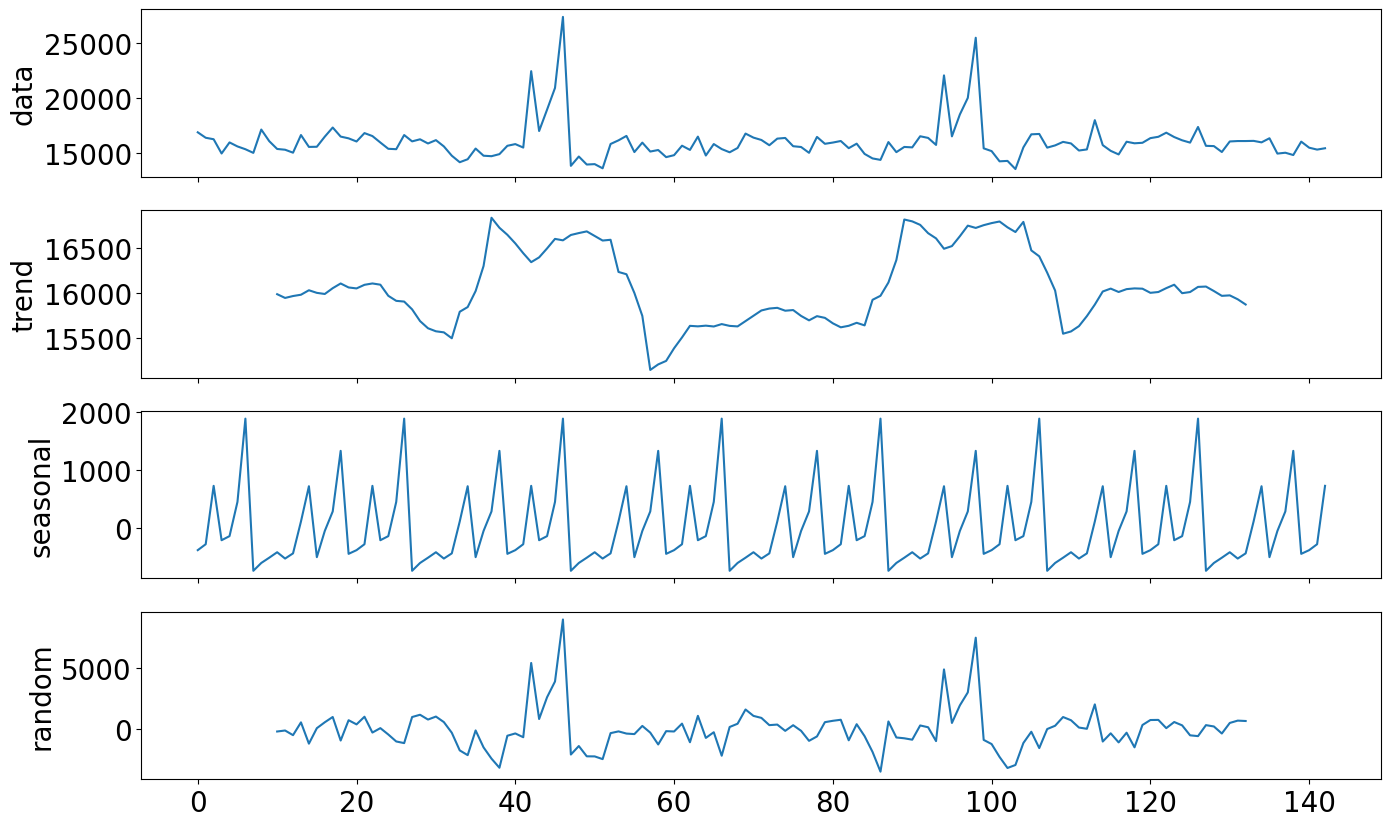

In [250]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

نلاحظ انها تتقارب كل 20 خطوة وهذا يساعد في ضبط المودل

# محاولة جعل البياناتاكثر ثبات

لتحقيق ذلك ننشأ نموذج بإستخدام بيانات مختلفة ومسجلة ومحولة

## 1. الفرق

In [256]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values

In [258]:
# taking mean and std of differenced data
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

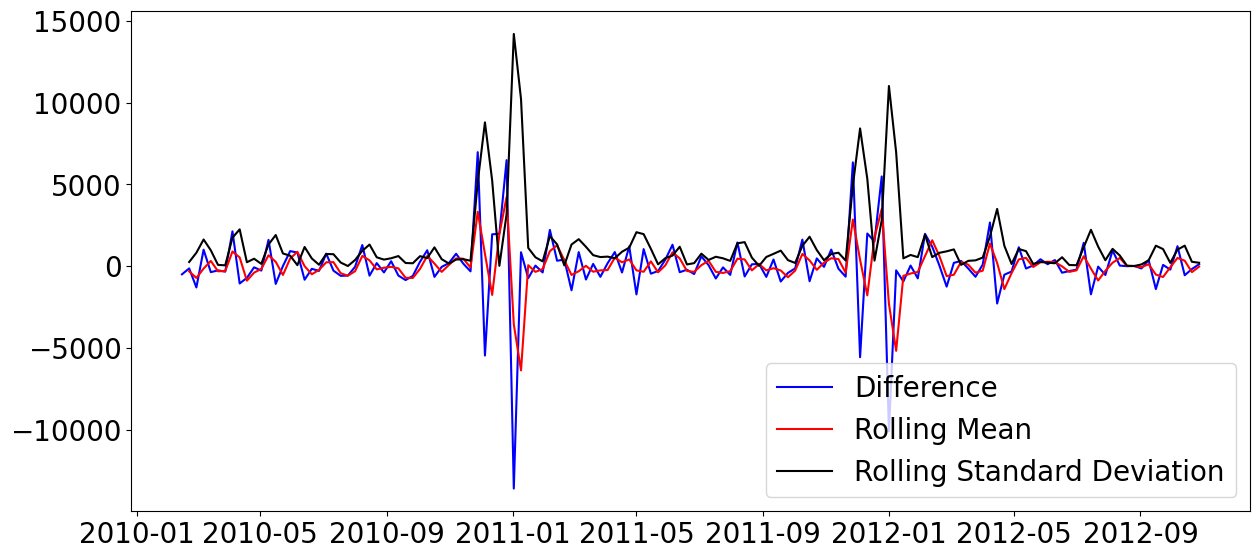

In [260]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()
plt.show()

## 2.التحول

In [263]:
df_week_lag = df_week['Weekly_Sales'].shift().dropna() #shifting the data 

In [265]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

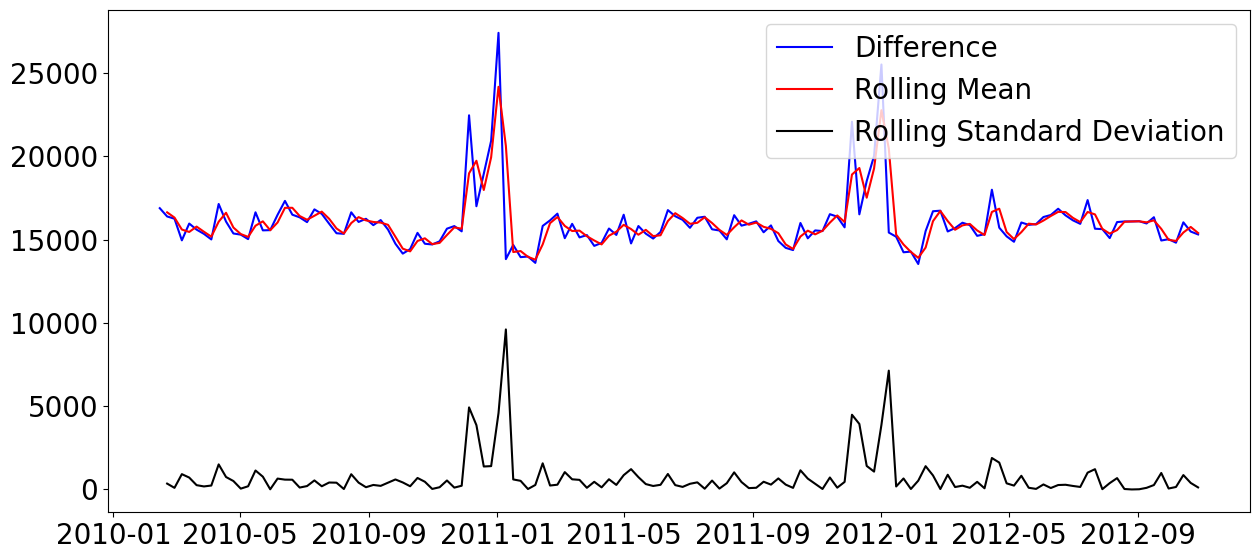

In [267]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()
plt.show()

## 3.السجل

In [270]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna() #taking log of data

In [272]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

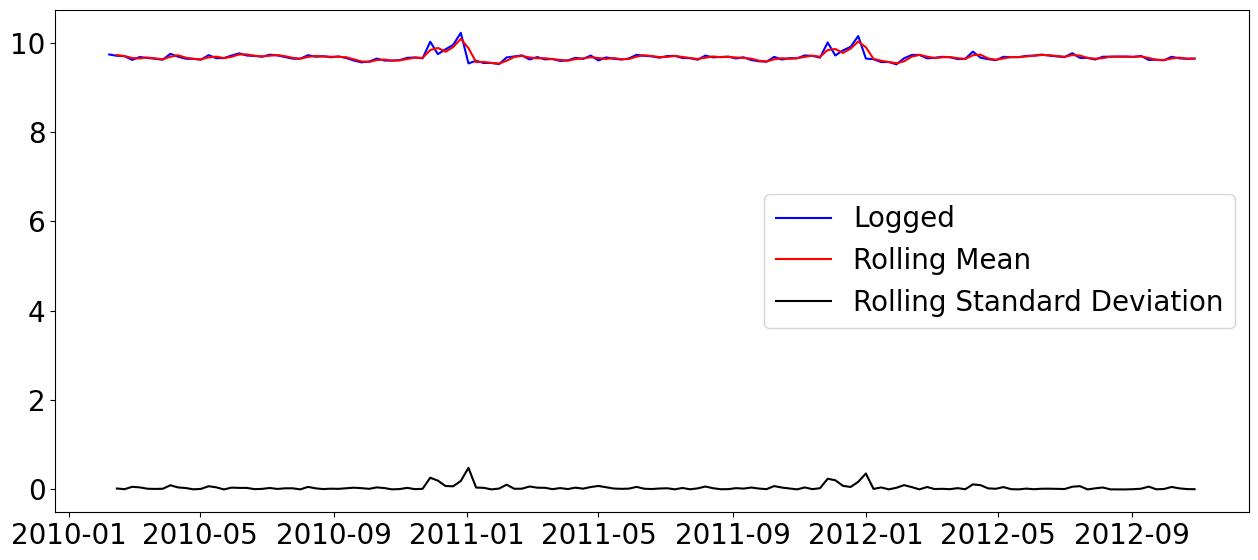

In [274]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()
plt.show()

# Auto-ARIMA MODEL

# تقسيم تدريب واختبار

In [278]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [280]:
# train_data = train_data['Weekly_Sales']
# test_data = test_data['Weekly_Sales']

model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1826.858, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1793.619, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1795.532, Time=0.26 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.051, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1794.966, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1801.215, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=1791.045, Tim

ARIMA(maxiter=200, order=(3, 0, 2), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

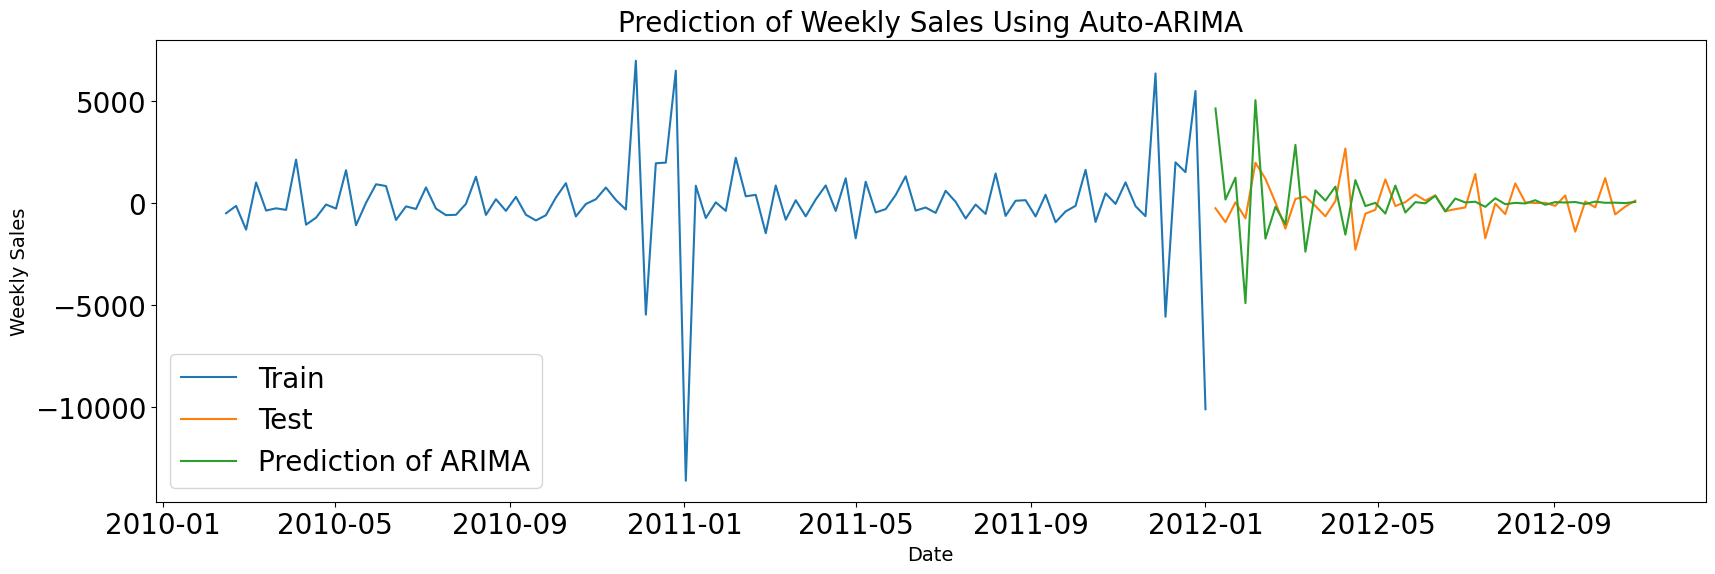

In [281]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

نجرب مودل ثاني دونت لايك

# ExponentialSmoothing

 المناسبة وفقًا لبياناتي Holt-Winters لقد قمتُ بفحص نماذج 

 
 يتم استخدام التنعيم الأسي عندما تحتوي البيانات على اتجاه حيث يعمل على تسطيح هذا الاتجاه. أما طريقة الاتجاه المخمد، فتضيف معامل تخميد، مما يجعل الاتجاه يتقارب إلى قيمة ثابتة في المستقبل

تحتوي بيانات الفرق الخاصة بي على بعض القيم السالبة والصفرية، لذلك استخدمت الموسمية والإتجاه الجمعي  بدلًا من الضربي  تم اختيار الفترات الموسمية بناءً على الرسوم البيانية المتحللة أعلاه. نظرًا لأن ضبط النموذج عبر التكرارات يستغرق وقتًا طويلاً، قمتُ بتغيير وتجربة النموذج بمعلمات مختلفة حتى وجدتُ أفضل المعلمات وقمتُ بتطبيقها على النموذج

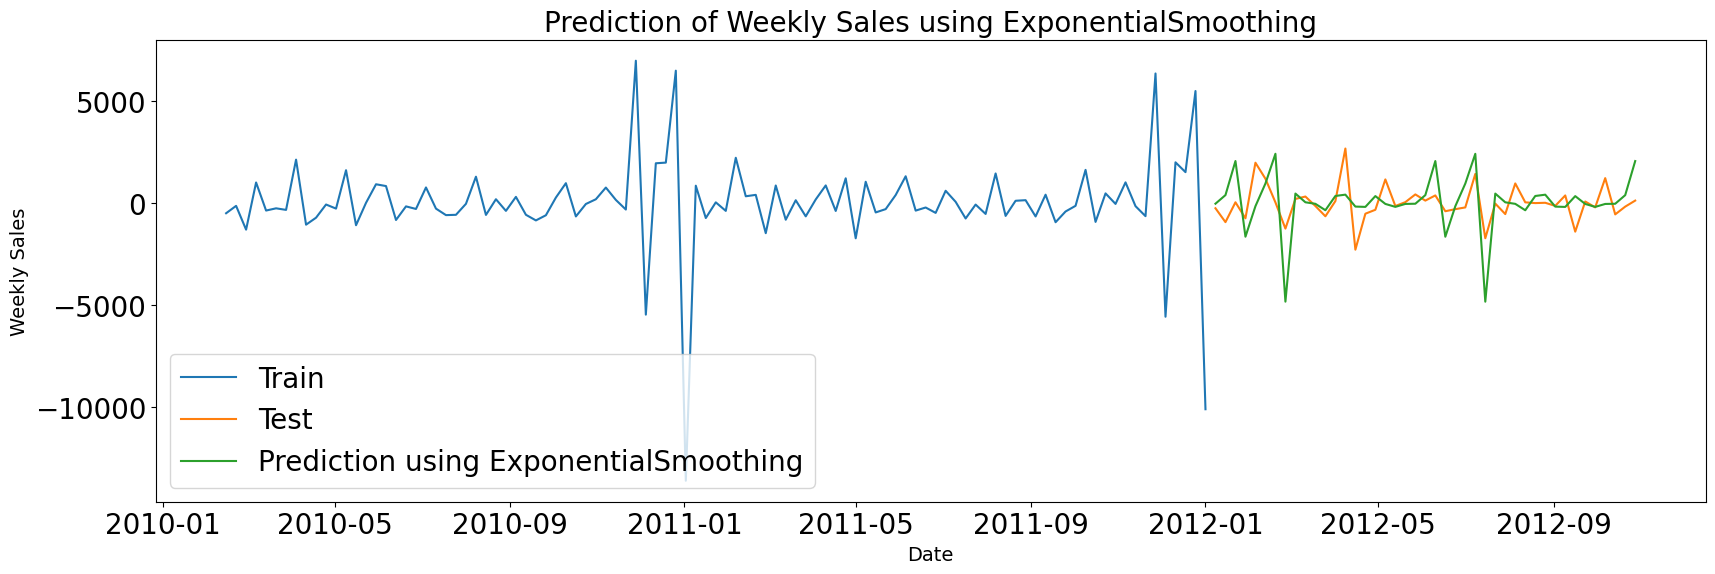

In [288]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()


In [290]:
wmae_test(test_data_diff, y_pred)

840.681060966696

في النهاية كانت افضل النتائج بإستخدام مودل التنعيم الاسي 💫

أفضل نتيجة حصلت عليها لهذا المشروع هي 821 وفقًا لمبالغ المبيعات، فإن هذه القيمة تمثل خطأً تقريبيًا يتراوح بين 4-5 💫

 إذا أخذنا متوسط المبيعات وحسبنا نسبة الخطأ البالغة 821، فسنجد أنها تقارب 4-5% تقريبًا